패스트캠퍼스 데이터사이언스스쿨의 김도형 박사님 수업을 듣고 강의자료를 정리한 파일입니다. 개인적으로 참고하기 위한 요약노트이니 자세한 내용을 원하시는 분은 https://datascienceschool.net 에 올라와 있는 강의자료를 참고하시기 바랍니다.

# NLTK 자연어 처리 패키지

- NLTK(Natural Language Toolkit) 패키지
- 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
- 주요 기능
    * 말뭉치
    * 토큰 생성
    * 형태소 분석
    * 품사 태깅

## 말뭉치(corpus)

- 자연어 분석 작업을 위해 만든 샘플 문서 집합
- 단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사. 형태소, 등의 보조적 의미를 추가하고 쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함
- NLTK 패키지의 `corpus` 서브패키지에서는 다양한 연구용 말뭉치를 제공
- `nltk.download('book')` 명령을 실행하면 NLTK 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드

In [87]:
# 말뭉치 가져오기
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

In [88]:
# 구텐베르크 말뭉치
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

이 중 제인 오스틴의 엠마 문서를 살펴보면 다음과 같이 원문 형태 그대로를 포함하고 있다.

In [86]:
# 제인 오스틴의 엠마
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:10000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 토큰 생성

- 토큰(token)
    - 자연어 문서를 분석하기 위해 나누는 문자열 단위
- 토큰 생성(tokenizing)
    - 이렇게 문자열을 토큰으로 나누는 작업
- 토큰 생성 함수(tokenizer)
    - 문자열을 토큰으로 분리하는 함수

In [38]:
# 문장 토큰 생성
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[1])

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


In [39]:
# 단어 토큰 생성
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [40]:
# 정규표현식을 사용한 토큰 생성
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석

- 형태소
    - 일정한 의미가 있는 가장 작은 말의 단위
    - 자연어 처리에서는 보통 형태소를 토큰으로 이용
- 형태소 분석(morphological analysis)
    - 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 형태소 분석의 예
    * 어간 추출(stemming)
    * 원형 복원(lemmatizing)
    * 품사 부착(Part-Of-Speech tagging)

 ### 어간 추출과 원형 복원

- 어간 추출(stemming)
    - 변화된 단어의 접미사나 어미를 제거해 같은 의미를 가지는 형태소의 기본형을 찾는 방법
    - NLTK는 `PorterStemmer`  `LancasterStemmer` 등을 제공
    - 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않음

In [41]:
words = ['lives', 'crying', 'flies', 'dying']

In [42]:
# PorterStemmer를 사용한 어간 추출
from nltk.stem import PorterStemmer
st = PorterStemmer()
[st.stem(w) for w in words]

['live', 'cri', 'fli', 'die']

In [43]:
# LancasterStemmer를 사용한 어간 추출
from nltk.stem import LancasterStemmer
st = LancasterStemmer()
[st.stem(w) for w in words]

['liv', 'cry', 'fli', 'dying']

- 원형 복원(lemmatizing)
    - 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
    - 품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있음

In [44]:
# WordNetLemmatizer를 사용한 원형 복원
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w) for w in words]

['life', 'cry', 'fly', 'dying']

In [45]:
# 품사 지정하기
lm.lemmatize("dying", pos="v")

'die'

## POS tagging

- 품사(POS, part-of-speech)
    - 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것 
    - NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)를 이용
- 다음은 펜 트리뱅크 태그세트에서 사용하는 품사의 예
    * NNP: 단수 고유명사
    * VB: 동사
    * VBP: 동사 현재형
    * TO: to 전치사
    * NN: 명사(단수형 혹은 집합형)
    * DT: 관형사
- 자세한 설명을 보려면 `nltk.help.upenn_tagset`

In [46]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [52]:
# pos_tag로 단어 토큰에 품사를 부착해 출력하기
from nltk.tag import pos_tag
sentence = "But there's one sound that no one knows. What does the fox say?"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('But', 'CC'),
 ('there', 'EX'),
 ("'s", 'VBZ'),
 ('one', 'CD'),
 ('sound', 'NN'),
 ('that', 'IN'),
 ('no', 'DT'),
 ('one', 'NN'),
 ('knows', 'VBZ'),
 ('.', '.'),
 ('What', 'WP'),
 ('does', 'VBZ'),
 ('the', 'DT'),
 ('fox', 'NNS'),
 ('say', 'VBP'),
 ('?', '.')]

In [53]:
# 품사 태그 정보로 특정 품사 토큰만 선택하기
nouns_list = [t[0] for t in tagged_list if t[1] == 'NN']
nouns_list

['sound', 'one']

In [54]:
# untag 명령으로 태그 튜플 제거하기
from nltk.tag import untag
untag(tagged_list)

['But',
 'there',
 "'s",
 'one',
 'sound',
 'that',
 'no',
 'one',
 'knows',
 '.',
 'What',
 'does',
 'the',
 'fox',
 'say',
 '?']

- Scikit-Learn 등에서 자연어 분석을 할 때는 같은 토큰이라도 품사가 다르면 다른 토큰으로 처리해야 하는 경우가 많음
- 이 때는 원래의 토큰과 품사를 붙여서 새로운 토큰 이름을 만들어 사용하면 철자가 같고 품사가 다른 단어를 구분할 수 있음

In [57]:
# 철자가 같고 품사가 다른 단어 구분하기
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['But/CC',
 'there/EX',
 "'s/VBZ",
 'one/CD',
 'sound/NN',
 'that/IN',
 'no/DT',
 'one/NN',
 'knows/VBZ',
 './.',
 'What/WP',
 'does/VBZ',
 'the/DT',
 'fox/NNS',
 'say/VBP',
 '?/.']

## Text 클래스

- 문서 분석에 유용한 메서드들을 제공
- 토큰열을 입력해 생성

In [58]:
from nltk import Text
text = Text(retokenize.tokenize(emma_raw), name="Emma")

- `plot` 메서드로 토큰의 사용 빈도 그리기

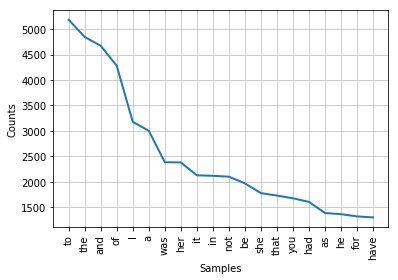

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt

text.plot(20)
plt.show()

- `dispersion_plot` 메서드로 단어가 사용된 위치를 시각화

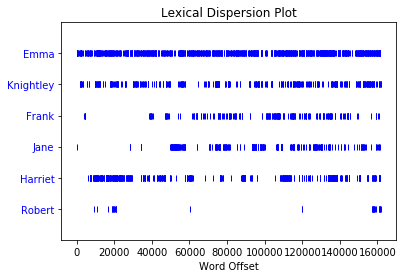

In [66]:
# 등장인물 나오는 위치 시각화하기
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

- `concordance` 메서드로 단어가 사용된 위치를 직접 표시하기

In [69]:
text.concordance('Emma', lines=5)

Displaying 5 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having


- `similar` 메서드로 해당 단어와 비슷한 문맥에서 사용된 단어들 찾기

In [70]:
text.similar('Emma', 10)

she it he i harriet you her jane him that


- `collocations` 메서드로 연어(collocation, 같이 붙어서 쓰이는 단어) 찾기

In [71]:
text.collocations(10)

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body


## FreqDist

- 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
- `Text` 클래스의 `vocab` 메서드로 추출

In [75]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

- 토큰 리스트를 넣어서 직접 만들 수도 있음
- 아래는 Emma 말뭉치에서 사람의 이름만 모아서 만든 `FreqDist` 클래스 객체. 품사 태그에서 `NNP`(고유대명사)이면서 필요없는 단어(stop words)는 제거
- `FreqDist` 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사

In [79]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

- 아래는 전체 단어의 수, "Emma"라는 단어의 출현 횟수와 확률을 계산

In [80]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

- `most_common` 메서드로 가장 출현 횟수가 높은 단어를 찾기

In [26]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

## 워드클라우드

- 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화

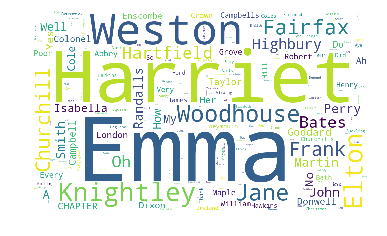

In [81]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()